# 1. Data Observation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "E:/Hackathon/CabFarePrediction/"

In [3]:
train = pd.read_csv(path+'TRAIN.CSV')
test = pd.read_csv(path + 'TEST.CSV')

In [4]:
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [5]:
train.shape, test.shape

((100000, 9), (25000, 8))

In [6]:
test.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,1543364124206,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,1543364124206,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [7]:
test['cab_type'].value_counts()

WAV             2180
UberXL          2180
Black           2151
UberX           2151
Black SUV       2150
UberPool        2144
Lyft            2059
Lux Black       2021
Shared          2018
Lyft XL         2016
Lux             1975
Lux Black XL    1955
Name: cab_type, dtype: int64

In [8]:
train['cab_type'].value_counts()

Black           8744
Black SUV       8712
UberXL          8676
UberX           8588
WAV             8585
UberPool        8558
Lyft XL         8115
Lux Black XL    8065
Lux             8060
Shared          7998
Lyft            7957
Lux Black       7942
Name: cab_type, dtype: int64

In [9]:
train['cab_provider'].value_counts()

Uber    51863
Lyft    48137
Name: cab_provider, dtype: int64

In [10]:
train['distance'].max(), train['distance'].min()

(7.5, 0.02)

In [11]:
train['surge_multiplier'].value_counts()

1.00    96753
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

The private rideshare service says it uses an algorithm based on classic supply and demand: When demand for cars goes up, prices go up to decrease demand and to encourage more drivers to get on the road, increasing supply.

` Price = Normal Price * Surge_multiplier `

# Exploratory Data Analaysis

## Missing values

In [12]:
train.isnull().sum()

index               0
time_stamp          0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
fare                0
dtype: int64

In [13]:
test.isnull().sum()

index               0
time_stamp          0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
dtype: int64

## Univariate Analysis (Target)

In [14]:
train['fare']

0        34.0
1        18.5
2        19.5
3        10.5
4        32.0
         ... 
99995    12.0
99996    26.0
99997    16.0
99998     7.0
99999     7.0
Name: fare, Length: 100000, dtype: float64

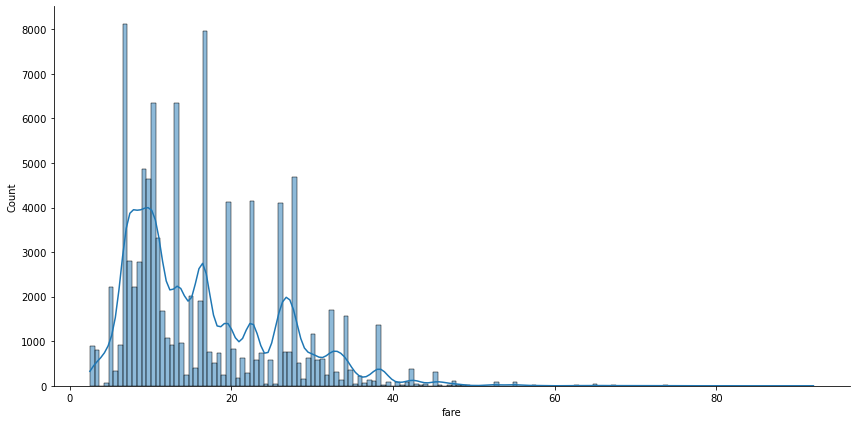

In [15]:
sns.displot(x = 'fare', data = train, aspect = 2, height = 6, kde = True);

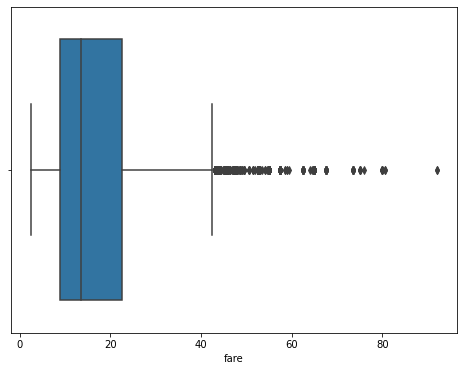

In [16]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'fare', data = train);

In [17]:
# Skew and kurt

print("Skewness: %f" % train['fare'].skew())
print("Kurtosis: %f" % train['fare'].kurt())

Skewness: 1.039652
Kurtosis: 1.149118


In [18]:
xtrain = train.copy()
xtest = test.copy()

In [19]:
# Let's apply Log(1+x) on Fare

xtrain['fare'] = np.log1p(xtrain['fare'])

### Extract Day Date and Time from TimeStamp

In [20]:
xtrain['date_time'] = pd.to_datetime(xtrain['time_stamp'] / 1000, unit = 's')

In [21]:
xtrain['hour'] = xtrain['date_time'].dt.hour

In [22]:
xtest['date_time'] = pd.to_datetime(xtest['time_stamp'] / 1000, unit = 's')

In [23]:
xtest['hour'] = xtest['date_time'].dt.hour

## Corrleation

Let's encode all the features and check the correlation

In [24]:
labeldf = xtrain.copy()

In [25]:
from sklearn import preprocessing

In [26]:
label_encoder = preprocessing.LabelEncoder()

In [27]:
for i in labeldf:
    if labeldf[i].dtypes == 'object':
        labeldf[i] = label_encoder.fit_transform(labeldf[i])

In [28]:
labeldf.head(4)

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date_time,hour
0,0,1543203646318,0,2,10,3.03,1.0,4,3.555348,2018-11-26 03:40:46.318000128,3
1,1,1543203646319,1,9,10,1.30,1.0,0,2.970414,2018-11-26 03:40:46.319000064,3
2,2,1543203646320,1,10,3,2.71,1.0,9,3.020425,2018-11-26 03:40:46.320000000,3
3,3,1543203646320,0,8,1,2.43,1.0,5,2.442347,2018-11-26 03:40:46.320000000,3


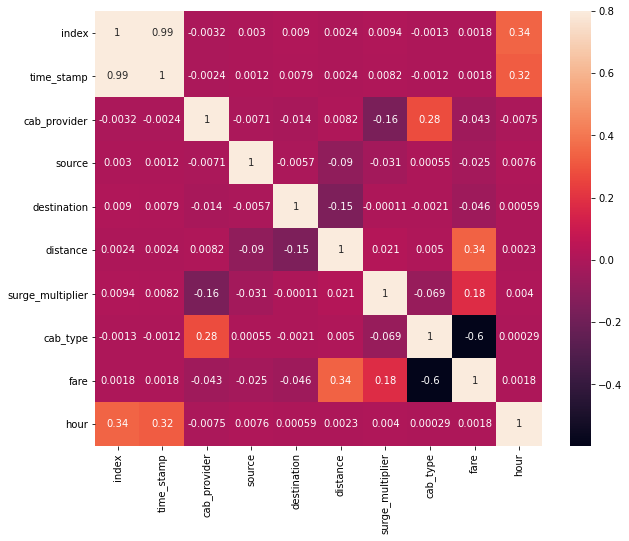

In [29]:
corrmat = labeldf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, vmax = .8, annot = True);

In [30]:
xtrain.drop('index', inplace = True, axis =1)
xtrain.drop('time_stamp', inplace = True, axis = 1)
xtrain.drop('date_time', inplace = True, axis = 1)

In [31]:
xtest.drop('index', inplace = True, axis =1)
xtest.drop('time_stamp', inplace = True, axis = 1)
xtest.drop('date_time', inplace = True, axis = 1)

## Fix skewed Features

In [32]:
# Fetch all numerical features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in xtrain.columns:
    if xtrain[i].dtype in numeric_dtypes:
        numeric.append(i)

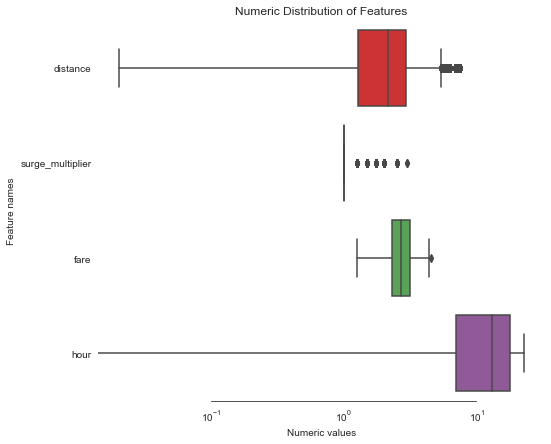

In [33]:
# Create box plots for all numeric features

sns.set_style('white')
f, ax = plt.subplots(figsize = (8,7))
ax.set_xscale('log')
ax = sns.boxplot(data = xtrain[numeric], orient = "h", palette = 'Set1')
ax.xaxis.grid(False)
ax.set(ylabel = "Feature names")
ax.set(xlabel = "Numeric values")
ax.set(title = "Numeric Distribution of Features")
sns.despine(trim = True, left = True)

### Balancing Dataset

In [34]:
# surge_multiplier

xtrain['surge_multiplier'].value_counts()

1.00    96753
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

In [35]:
onefilter = xtrain[xtrain['surge_multiplier'] == 1.00][:10000]

In [36]:
one25filter = xtrain[xtrain['surge_multiplier'] == 1.25][:2000]

In [37]:
xtrain = xtrain[xtrain['surge_multiplier'] != 1.00]
xtrain = xtrain[xtrain['surge_multiplier'] != 1.25]

In [38]:
xtrain['surge_multiplier'].value_counts()

1.50    764
1.75    403
2.00    337
2.50     23
3.00      5
Name: surge_multiplier, dtype: int64

In [39]:
xtrain = pd.concat([xtrain, onefilter, one25filter])

In [40]:
xtrain['surge_multiplier'].value_counts()

1.00    10000
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

In [41]:
xtest['surge_multiplier'].value_counts()

1.00    24141
1.25      453
1.50      210
1.75       97
2.00       89
2.50        8
3.00        2
Name: surge_multiplier, dtype: int64

In [42]:
#xtrain = xtrain[xtrain['surge_multiplier'] != 3.00]
#xtrain = xtrain[xtrain['surge_multiplier'] != 2.50]


In [43]:
xtrain['surge_multiplier'].value_counts()

1.00    10000
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

In [44]:
xtest['surge_multiplier'].value_counts()

1.00    24141
1.25      453
1.50      210
1.75       97
2.00       89
2.50        8
3.00        2
Name: surge_multiplier, dtype: int64

In [45]:
xtrain.shape

(13247, 8)

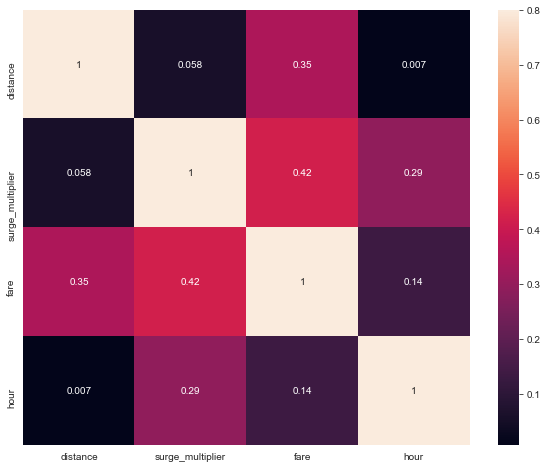

In [46]:
# Correlation


corrmat = xtrain.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, vmax = .8, annot = True);

In [47]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [48]:
# Find skewed numerical features

skew_features = xtrain[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 3 numerical features with Skew > 0.5 :


surge_multiplier    2.551035
hour                0.818830
distance            0.743200
fare               -0.002987
dtype: float64

In [49]:
xtrain['distance'].value_counts()

2.84    157
1.35    148
3.05    143
2.66    134
1.25    131
       ... 
4.80      1
3.89      1
4.08      1
4.01      1
6.27      1
Name: distance, Length: 440, dtype: int64

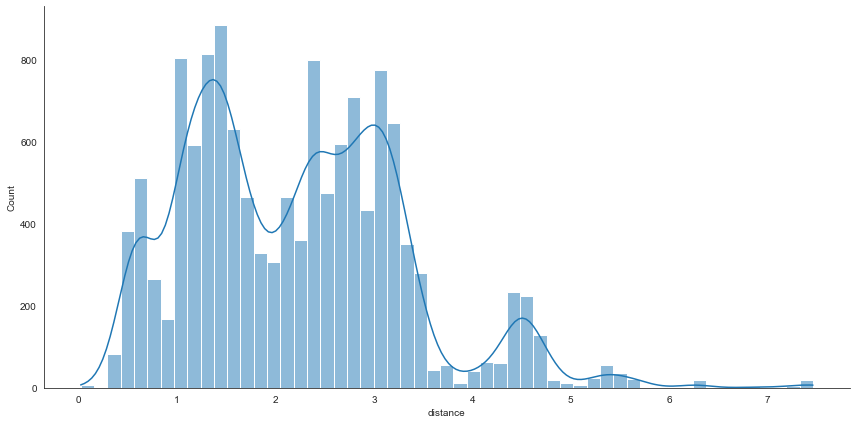

In [50]:
sns.displot(x = 'distance', data = xtrain, aspect = 2, height = 6, kde = True);

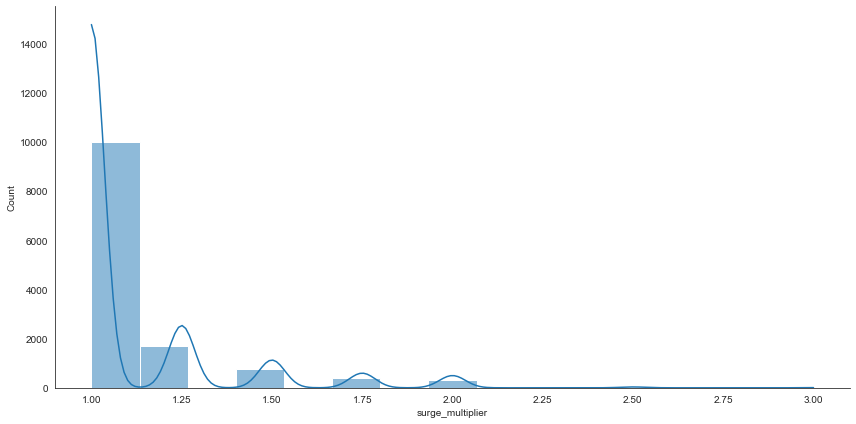

In [51]:
sns.displot(x = 'surge_multiplier', data = xtrain, aspect = 2, height = 6, kde = True);

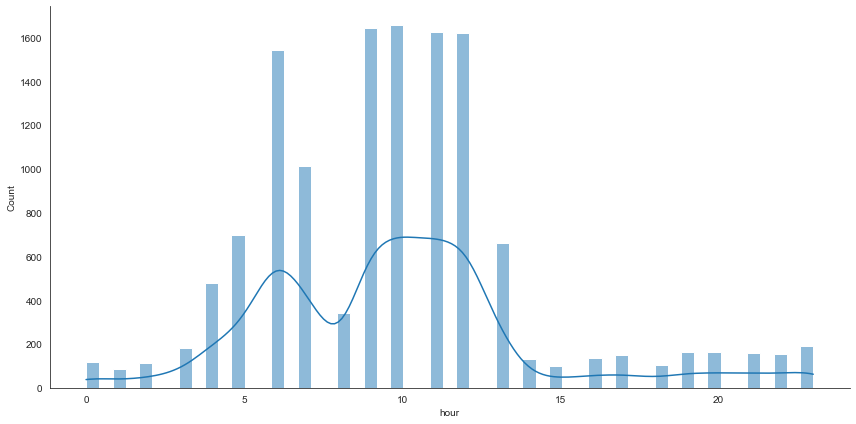

In [52]:
sns.displot(x = 'hour', data = xtrain, aspect = 2, height = 6, kde = True);

In [53]:
xxtrain = xtrain.copy()
xxtest = xtest.copy()

# Normalize skewed features


xxtrain["hour"] = np.log1p(xtrain['hour'])
xxtrain["day"] = np.log1p(xtrain['day'])

In [54]:
xxtrain["distance"] = np.log1p(xtrain['distance'])

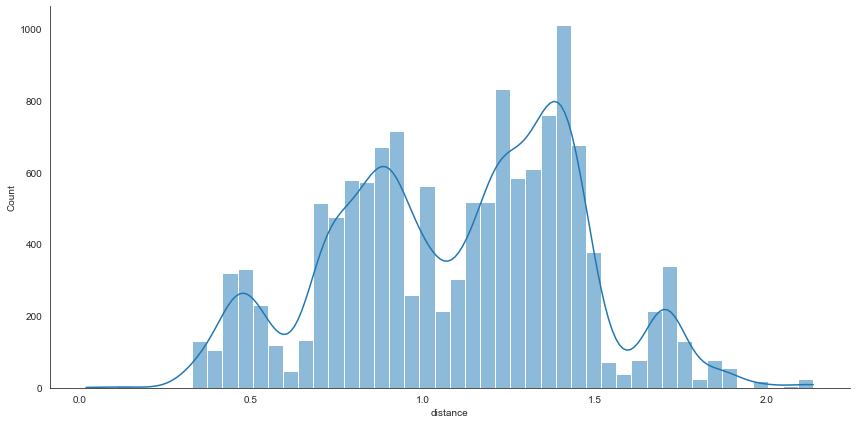

In [55]:
sns.displot(x = 'distance', data = xxtrain, aspect = 2, height = 6, kde = True);

In [56]:
xxtrain["distance"].value_counts()

1.345472    157
0.854415    148
1.398717    143
1.297463    134
0.810930    131
           ... 
1.589235      1
1.781709      1
1.611436      1
1.983756      1
1.757858      1
Name: distance, Length: 440, dtype: int64

In [57]:
# Find skewed numerical features (train set)

skew_features = xxtrain[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 2 numerical features with Skew > 0.5 :


surge_multiplier    2.551035
hour                0.818830
fare               -0.002987
distance           -0.111739
dtype: float64

In [58]:
# Fetch all test numerical features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
test_numeric = []
for i in xtest.columns:
    if xtest[i].dtype in numeric_dtypes:
        test_numeric.append(i)

In [59]:
# Find skewed numerical features (Test Set)

skew_features = xxtest[test_numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 2 numerical features with Skew > 0.5 :


surge_multiplier    8.065760
distance            0.780901
hour               -1.848065
dtype: float64

In [60]:
xxtest['distance'] = np.log1p(xxtest['distance'])

In [61]:
# After fixing skewness

skew_features = xxtest[test_numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 1 numerical features with Skew > 0.5 :


surge_multiplier    8.065760
distance           -0.111603
hour               -1.848065
dtype: float64

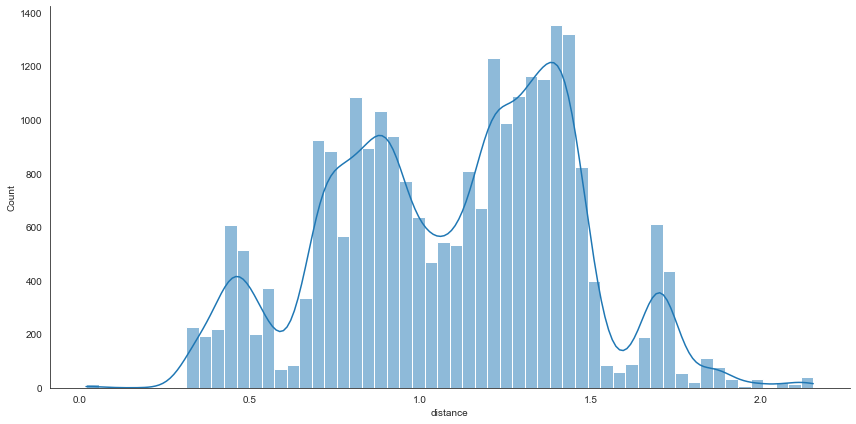

In [62]:
sns.displot(x = 'distance', data = xxtest, aspect = 2, height = 6, kde = True);

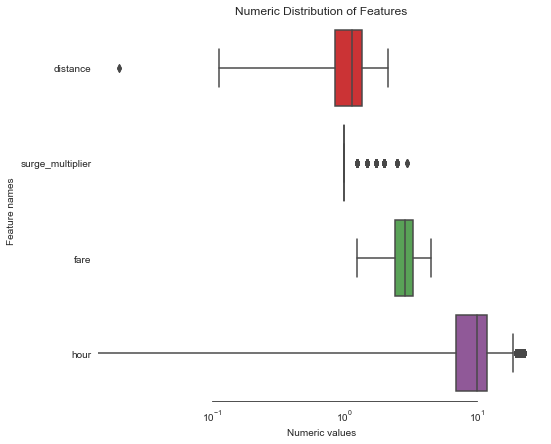

In [63]:
# Create box plots for all numeric features

sns.set_style('white')
f, ax = plt.subplots(figsize = (8,7))
ax.set_xscale('log')
ax = sns.boxplot(data = xxtrain[numeric], orient = "h", palette = 'Set1')
ax.xaxis.grid(False)
ax.set(ylabel = "Feature names")
ax.set(xlabel = "Numeric values")
ax.set(title = "Numeric Distribution of Features")
sns.despine(trim = True, left = True)

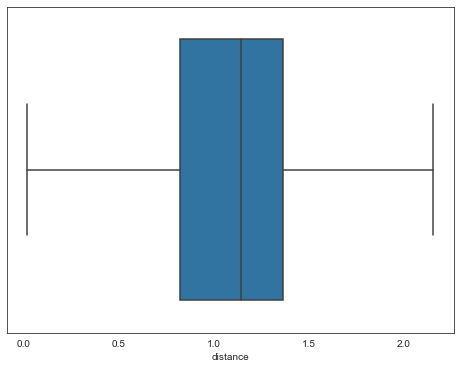

In [64]:
# Distance

plt.figure(figsize = (8,6))
sns.boxplot(x = 'distance', data = xxtest);

## Outliers

In [65]:
xxtrain.describe()

,distance,surge_multiplier,fare,hour
count,13247.000000,13247.000000,13247.000000,13247.000000
mean,1.103427,1.112818,2.838112,9.833472
std,0.351460,0.240322,0.561345,4.324807
min,0.019803,1.000000,1.252763,0.000000
25%,0.845868,1.000000,2.442347,7.000000
50%,1.147402,1.000000,2.862201,10.000000
75%,1.373716,1.000000,3.295837,12.000000
max,2.135349,3.000000,4.532599,23.000000


In [66]:
xxtest.describe()

,distance,surge_multiplier,hour
count,25000.000000,25000.000000,25000.000000
mean,1.094555,1.015840,9.842960
std,0.354210,0.098815,3.663577
min,0.019803,1.000000,0.000000
25%,0.824175,1.000000,9.000000
50%,1.144223,1.000000,11.000000
75%,1.363537,1.000000,12.000000
max,2.154085,3.000000,14.000000


## Encode Categorical Features

In [67]:
xxtrain = pd.get_dummies(xxtrain).reset_index(drop = True)
xxtest = pd.get_dummies(xxtest).reset_index(drop = True)

In [68]:
xxtrain

,distance,surge_multiplier,fare,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,1.697449,1.75,3.881564,3,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1.697449,1.75,4.151040,3,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.978326,1.75,3.295837,3,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.713798,1.50,3.881564,4,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.713798,1.50,3.157000,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13242,1.350667,1.25,3.157000,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13243,1.350667,1.25,3.020425,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13244,1.350667,1.25,2.674149,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13245,1.350667,1.25,3.433987,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [69]:
xxtest

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0.463734,1.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.463734,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.057963,1.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.854415,1.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.463734,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.398717,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,1.398717,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,1.398717,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1.376244,1.0,14,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Models , Evaluation Metrics and Tuning

## Training and test sets

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


extrain = xxtrain.copy()
extrain = extrain.sample(frac = 1)
extrain = extrain.iloc[:10000]

In [145]:
X = xxtrain.drop('fare', axis = 1)
y = xxtrain['fare']

# test data

tX = xxtest.copy()

In [146]:
scaler = StandardScaler()

**Scaling Training Data**

In [147]:
X

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,1.697449,1.75,3,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.697449,1.75,3,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.978326,1.75,3,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.713798,1.50,4,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.713798,1.50,4,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13242,1.350667,1.25,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13243,1.350667,1.25,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13244,1.350667,1.25,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13245,1.350667,1.25,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [148]:
X[['hour']] = scaler.fit_transform(X[['hour']])

In [149]:
X

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,1.697449,1.75,-1.580123,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.697449,1.75,-1.580123,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.978326,1.75,-1.580123,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.713798,1.50,-1.348891,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.713798,1.50,-1.348891,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13242,1.350667,1.25,-2.273822,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13243,1.350667,1.25,-2.273822,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13244,1.350667,1.25,-2.273822,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13245,1.350667,1.25,-2.273822,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [150]:
scaler = StandardScaler()

**Scaling Testing Data**

In [151]:
tX

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0.463734,1.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.463734,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.057963,1.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.854415,1.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.463734,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.398717,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,1.398717,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,1.398717,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1.376244,1.0,14,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [152]:
tX[['hour']] = scaler.fit_transform(tX[['hour']])

In [153]:
tX

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0.463734,1.0,-2.686761,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.463734,1.0,-2.686761,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.057963,1.0,-2.686761,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.854415,1.0,-2.686761,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.463734,1.0,-2.686761,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.398717,1.0,1.134717,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,1.398717,1.0,1.134717,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,1.398717,1.0,1.134717,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1.376244,1.0,1.134717,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Multicollinearity

In [ ]:
X.corr()

In [ ]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5))&(i!=j)]
z, len(z)

## Calculating VIF

In [ ]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

In [ ]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [ ]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

In [ ]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

In [ ]:
X = vif_data[:]

## Multicollinearity Test Data

In [ ]:
tX.shape

In [ ]:
## pair of independent variables with correlation greater than 0.5
k = tX.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

In [ ]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = tX[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

In [ ]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [ ]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

In [ ]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

In [ ]:
tX = vif_data[:]

In [ ]:
tX.shape, X.shape

In [ ]:
tX

In [154]:
from sklearn.model_selection import KFold, cross_val_score

In [155]:
# Setup cross validation folds

kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [156]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Setup cross validation and define error metrics

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

### Setup models

In [159]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV, LassoCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#### Linear Regression

In [160]:
model = LinearRegression()

In [161]:
model.fit(X_train, y_train)

LinearRegression()

In [162]:
print("Test R^2 Score: {:.5f}".format(model.score(X, y)))

Test R^2 Score: 0.95475


### Ridge Regressor

In [87]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

In [88]:
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kf))

### Lasso

In [89]:
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

In [90]:
lasso = make_pipeline(RobustScaler(), 
                     LassoCV(max_iter = 1e7, alphas = alphas2,
                            random_state = 42, cv = kf))

### Elasticnet

In [91]:
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

In [92]:
elasticnet = make_pipeline(RobustScaler(),
                          ElasticNetCV(max_iter = 1e7, 
                                      alphas = e_alphas,
                                      cv = kf, 
                                      l1_ratio = e_l1ratio))

### Support Vector Regressor

In [93]:
param_grid={
    
        'C': [0.1, 1, 100, 1000],
        
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
        
        'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        
    }
    

svr = SVR(kernel = 'rbf')

svr_grid = GridSearchCV(svr,
                      param_grid,
                      cv = 2, 
                      scoring = 'neg_mean_squared_error',
                      verbose = 0, 
                      n_jobs = 4)

In [94]:
svr_grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
             scoring='neg_mean_squared_error')

In [95]:
print(svr_grid.best_score_)

-0.012027710530874341


In [96]:
print(svr_grid.best_params_)

svr_params = svr_grid.best_params_

{'C': 100, 'epsilon': 0.05, 'gamma': 0.005}


In [97]:
svr = make_pipeline(RobustScaler(),
                   SVR(**svr_params))

### Gradient Boosting Regressor

In [98]:
gbr = GradientBoostingRegressor()

gbr_params = parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }


gbr_grid = GridSearchCV(gbr, gbr_params, 
                        cv =2 , 
                        n_jobs = 4, 
                        verbose = True)

gbr_grid.fit(X_train,y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]},
             verbose=True)

In [99]:
print(gbr_grid.best_score_)

0.9626358272542775


In [100]:
print(gbr_grid.best_params_)

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}


In [101]:
gbr_params = gbr_grid.best_params_

In [102]:
gbr = GradientBoostingRegressor(**gbr_params)

**GBR with balanced dataset**

- R2 Score: 0.9704435818146127
- Mean Squarred Error: 0.009362925635660182
- RMSE: 0.09676221181670137
- Mean Absolute Error : 0.06750763991137315

### Light GBM

In [103]:
# Light Gradient Boosting Regressor

lightgbm = LGBMRegressor()

param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

gbm_grid = GridSearchCV(lightgbm, 
                   param_grid, 
                   cv = 2, 
                   n_jobs = 4,
                   verbose = True)
gbm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2916 candidates, totalling 5832 fits


GridSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=4,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [15, 20, 25],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [400, 700, 1000],
                         'num_leaves': [50, 100, 200],
                         'reg_alpha': [1.1, 1.2, 1.3],
                         'reg_lambda': [1.1, 1.2, 1.3],
                         'subsample': [0.7, 0.8, 0.9], 'subsample_freq': [20]},
             verbose=True)

In [104]:
print(gbm_grid.best_score_)

0.956836718320776


In [105]:
print(gbm_grid.best_params_)

{'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.3, 'subsample': 0.9, 'subsample_freq': 20}


In [106]:
gbm_params = gbm_grid.best_params_

lightgbm = LGBMRegressor(**gbm_params)

### XGBoost

In [107]:
#XGBoost Regressor
xgboost = XGBRegressor()

param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgboost, 
                   param_grid, 
                   cv = 2, 
                   n_jobs = 4, 
                   verbose = True)

xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[15:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [108]:
print(xgb_grid.best_score_)

0.963583453970514


In [109]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [110]:
xgboost_params = xgb_grid.best_params_

xgboost = XGBRegressor(**xgboost_params)

### StackingCVRegressor

In [111]:
# 
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

## Train Models

In [112]:
score = {}

In [114]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ridge: 0.1199 (0.0041)


In [115]:
score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1197 (0.0041)



In [116]:
score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f}) \n".format(score.std(), score.mean()))

ElasticNet score: 0.0041 (0.1197) 



In [117]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))

SVR: 0.1069 (0.0056)


In [118]:
score = cv_rmse(lightgbm)
print("lightgmb: {:.4f} ({:.4f})".format(score.mean(), score.std()))

lightgmb: 0.1114 (0.0046)


In [119]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))

gbr: 0.1048 (0.0047)


In [120]:
score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost cor

### Fit the models

In [121]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

stack_gen
[15:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to X

In [122]:
print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

elasticnet


In [123]:
print('lasso')
lasso_model_full_data = lasso.fit(X, y)

lasso


In [124]:
print('ridge')
ridge_model_full_data = ridge.fit(X, y)

ridge


In [125]:
print('Svr')
svr_model_full_data = svr.fit(X, y)

Svr


In [126]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

GradientBoosting


In [127]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

xgboost
[15:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [128]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

lightgbm


### Blend models and get Predictions

In [129]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

In [131]:
# Get final precitions from the blended model
blended_score = rmsle(y, blended_predictions(X))
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.10084396357679443


**Blended Predictions:** (Attempt 1) with own parameters

- RMSLE score on train data: 0.08116570706030446

**Blended Predictions:** (Attempt 2) with copied parameters

- RMSLE score on train data: 0.08811897173781841

**Blended Predictions:** (Attempt 3) Attempt 2 idea +  with more dataset 

- RMSLE score on train data: 0.08804230009082731

**(Attempt 4)** RMSLE score on train data: 0.07062468155494964

**(Attempt 5)** RMSLE score on train data: 0.09742269227013421

In [132]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

NameError: name 'scores' is not defined

<Figure size 1728x864 with 0 Axes>

In [ ]:
## Submit predictions

submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission

In [133]:
output = pd.DataFrame(columns = ['index','fare'])

In [134]:
output['index'] = test.index

In [135]:
output['index'] = output['index'].astype('str')

In [136]:
output['fare'] = np.floor(np.expm1(blended_predictions(tX)))

In [137]:
output.head(12)

,index,fare
0,0,11.0
1,1,25.0
2,2,15.0
3,3,12.0
4,4,10.0
5,5,9.0
6,6,4.0
7,7,6.0
8,8,28.0
9,9,5.0


In [ ]:
output['fare'] *= 1.000619

In [138]:
output.to_csv('improved_output.csv', index = False)

In [ ]:
output

In [ ]:
output.to_csv('blended_predictions_output2.csv', index = False)